In [1]:
## End goal: Maximize magnitude of stars at specific temperatures through different filters

## import all the nice things we're using for our plots and maths

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
%matplotlib inline 

In [2]:
## define our "getfilter" function
## will allow us to call the specific type of filter we want 

def getfilter(band):
    
    if band=='Ks':          ## red
        lambda_eff=2.159         # m^-6
        halfwidth=0.262/2.0      # m^-6
        F0=4.283E-14             # W/m^-2/m^-6
    
    elif band=='H':
        lambda_eff=1.662
        halfwidth=0.251/2.0
        F0=1.133E-13
    
    elif band=='J': 
        lambda_eff=1.235
        halfwidth=0.162/2.0 
        F0=3.129E-13
    
    elif band=='U':
        lambda_eff=0.365
        halfwidth=0.066/2.0
        F0=4.19E-12
    
    elif band=='B':            ## blue
        lambda_eff=0.445
        halfwidth=0.094/2.0
        F0=6.60E-12
    
    elif band=='V':            ## green
        lambda_eff=0.551
        halfwidth=0.088/2.0
        F0=3.61E-12
    
    elif band=='R': 
        lambda_eff=0.658
        halfwidth=0.138/2.0
        F0=2.25E-12
    
    elif band=='I':
        lambda_eff=0.806
        halfwidth=0.149/2.0
        F0=1.22E-12
    
    return lambda_eff, halfwidth, F0    ## because we need these as inputs to our next functions

In [3]:
## define the blackbody radiation curve (the planck curve) as a function 

def planck(x, T):
    
    h = 6.626e-34
    c = 3.0e+8
    k = 1.38e-23
    
    a0 = 2.0*h*c**2
    b0 = (h*c)/(x*k*T)
    intensity = a0 / ( (x**5) * (np.exp(b0) - 1.0) )
    return intensity

wavelengths = np.arange(1e-9, 3e-6, 1e-9) ## for our "x" value in the function
temperatures = np.arange(2500, 38000, 1) ## for our "T" value in the function; the full range of Main Sequence temps

In [23]:
## define our magnitude function; its end goal is to get the magnitude (m = -2.5 log (f/fx)) for our given parameters

def planck_mag(lambda_eff, halfwidth, F0):    ## like I said, it takes in the following arguments for certain filters
     
    a = (lambda_eff - halfwidth)*1e-6   ## upper integral limit
    b = (lambda_eff + halfwidth)*1e-6   ## lower integral limit
    
    flux_x = F0*2*halfwidth*1e4         ## *1e4 to get from /m^-2 to W/m^2
    
    flux_array = []                     ## just defining an array to put our calculated fluxes in
    magnitude_array = []                ## and one for our magnitudes as well 
    
    for t in temperatures:              ## iterating through all possible temperatures to get flux
        flux = quad(planck, a, b, args=(t))[0]    ## quad takes the integral from a to b, and I called the planck function because that's what we're integrating 
        flux = flux/(4*np.pi*(3.086e17)**2)       ## NOTE that 'planck' is divided by 4*pi*(10pc)^2 to get a more realistic flux (stars are far away from us)
        flux_array = np.append(flux_array, flux)  ## this collects our flux values in an array
        
    for f in flux_array:                          ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(f/flux_x)       ## this is the function we want
        magnitude_array = np.append(magnitude_array, magnitude)     ## again calculating 
    
    return magnitude_array

In [24]:
lambda_eff, halfwidth, F0 = getfilter('Ks') ## calling the getfliter function to specify band

Ks_magnitudes = planck_mag(lambda_eff, halfwidth, F0) ## calling the planck_mag function using our band-specific variables

In [25]:
lambda_eff, halfwidth, F0 = getfilter('B') ## calling the getfliter function to specify band

B_magnitudes = planck_mag(lambda_eff, halfwidth, F0)

In [27]:
lambda_eff, halfwidth, F0 = getfilter('V') ## calling the getfliter function to specify band

V_magnitudes = planck_mag(lambda_eff, halfwidth, F0)

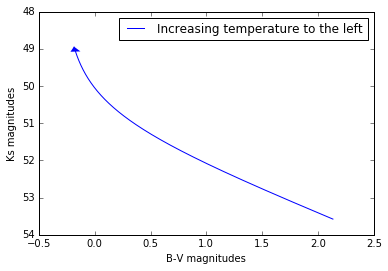

In [8]:
B_minus_V = B_magnitudes - V_magnitudes ## taking the difference between the B and V magnitudes to plot against the Ks magnitudes 

magnitude_plot = plt.plot(B_minus_V, Ks_magnitudes, label='Increasing temperature to the left') ## plotting them against each other, 
plt.ylabel('Ks magnitudes')
plt.xlabel('B-V magnitudes')
plt.gca().invert_yaxis() ## inverting the y-axis to show and increasing temperature
plt.legend(loc='upper right')
plt.arrow(B_minus_V[35499], Ks_magnitudes[35499], (B_minus_V[35499] - B_minus_V[35000]), (Ks_magnitudes[35499] - Ks_magnitudes[35000]), shape='full', lw=0, length_includes_head=True, head_width=.09)



In [9]:
## Goals: multiply by alotted light as a function of wavelength; Effects of Interstellar Extinction; trying to find limits 
## planck flux multiplied by this function, THEN the integral to get a more accurate magnitude 
## filter transmission files 
## question: Which data to use: J-H vs H-J http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html

In [4]:
## let's get data directly from the web

import urllib 

uf = urllib.urlopen("http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.tbl3.html")
html = uf.readlines()[3:79]
 ## use split 
print html

['1.900   0.\n', '1.915   8.16050E-06\n', '1.927   1.61002E-05\n', '1.934   1.59036E-04\n', '1.939   4.94992E-04\n', '1.948   5.37610E-03\n', '1.957   1.18628E-02\n', '1.962   1.97031E-02\n', '1.969   4.21742E-02\n', '1.976   8.73064E-02\n', '1.981   0.152759\n', '1.989   0.248173\n', '1.990   0.190245\n', '1.998   0.233884\n', '2.008   0.294551\n', '2.014   0.398217\n', '2.019   0.336603\n', '2.028   0.620746\n', '2.037   0.764986\n', '2.045   0.746412\n', '2.061   0.625063\n', '2.072   0.725492\n', '2.075   0.689468\n', '2.082   0.787906\n', '2.089   0.818135\n', '2.099   0.822833\n', '2.106   0.863294\n', '2.113   0.877829\n', '2.120   0.854895\n', '2.124   0.895329\n', '2.138   0.918862\n', '2.145   0.926769\n', '2.155   0.926657\n', '2.169   0.900943\n', '2.176   0.922819\n', '2.185   0.842755\n', '2.197   0.945854\n', '2.208   0.980363\n', '2.213   0.987926\n', '2.218   0.984788\n', '2.232   0.964659\n', '2.237   0.981633\n', '2.248   0.983449\n', '2.256   0.961316\n', '2.260   0

In [21]:
## yikes that didn't work. Let's just enter it manually

Ks_wav = [1.9, 1.915, 1.927, 1.934, 1.939, 1.948, 1.957, 1.962, 1.969, 1.976, 1.981, 1.989, 1.99, 1.998, 2.008, 2.014, 2.019, 2.028, 2.037,
2.045, 2.061, 2.072, 2.075, 2.082, 2.089, 2.099, 2.106, 2.113, 2.12, 2.124, 2.138, 2.145, 2.155, 2.169, 2.176, 2.185, 2.197, 2.208, 2.213, 2.218, 2.232, 2.237, 2.248, 2.256, 2.26, 2.263, 2.265, 2.27, 2.272, 2.276, 2.277, 2.281, 2.284, 2.286, 2.291, 2.293, 2.295, 2.297, 2.299, 2.306, 2.311, 2.316, 2.32, 2.325, 2.328, 2.335, 2.339, 2.344, 2.346, 2.352, 2.361, 2.363, 2.37, 2.375, 2.384, 2.399]

## above are the wavelengths in microns; below is the corresponding flux values

Ks_resp = [0, 8.16E-06,1.61E-05,1.59E-04,4.95E-04,5.38E-03,1.19E-02,1.97E-02,4.22E-02,8.73E-02,0.152759,0.248173,0.190245,0.233884,0.294551,0.398217,0.336603,0.620746
          ,0.764986,0.746412,0.625063,0.725492,0.689468,0.787906,0.818135,0.822833,0.863294,0.877829,0.854895,0.895329
          ,0.918862,0.926769,0.926657,0.900943,0.922819,0.842755,0.945854,0.980363,0.987926,0.984788,0.964659,0.981633,0.983449,0.961316,0.979226,1,0.963168,0.981193,0.968068
          ,0.910892,0.982136,0.889606,0.891766,0.94238,0.840424,0.804239,0.70767,0.657619,0.560736,0.443653,0.348239,0.230228
          ,0.162597,0.135967,9.21E-02,6.24E-02,4.31E-02,3.40E-02,3.10E-02,1.18E-02,6.83E-03,7.49E-04,3.00E-03,2.10E-03,4.06E-04,0]

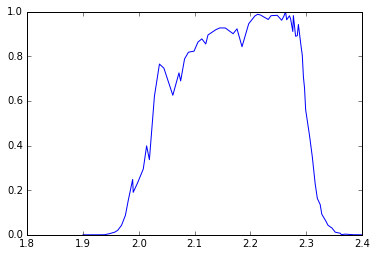

In [29]:
Ks_curve = plt.plot(Ks_wav, Ks_resp)

In [33]:
def data_mag(halfwidth, F0):    ## like I said, it takes in the following arguments for certain wavebands
    
    flux_x = F0*2*halfwidth*1e4         ## *1e4 to get from /m^-2 to W/m^2
        
    f = np.trapz(Ks_curve)
    
    ## scipy.interpolate (x, y, x_wanted)
    ## multiply blackbody with this THEN integrate 
    
    magnitude = -2.5*np.log10(f/flux_x)       ## this is the function we want
    
    return magnitude

In [34]:
lambda_eff, halfwidth, F0 = getfilter('Ks') ## calling the getfliter function to specify band

Ks_magnitudes = data_mag(halfwidth, F0)

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


In [3]:
## html
## fix the data_mag function 
## Github
## Going forward: Plotting color to color (magJ-magH) vs (magH-magK)
## Theory behind Holly's research 

ipython nbconvert--to html Research_Filters.ipynb  

SyntaxError: invalid syntax (<ipython-input-3-14db03931ba7>, line 7)